# Activity 1

Class activity. Solve for current.

| $V_{bias}$ | MOSFET Operation Mode | $I_D$ (mA) | $V_D$ (V) |
| ------ | --------------------- | -------- | ------- |
| 0.5    | OFF | 0    | 3    |
| 1.0    | SAT | .175 | 2.47 |
| 1.2    | SAT | .377 | 1.87 |
| 1.5    | SAT | .77  | .69 |
| 2.0    | LINEAR | .87 | .37 |
| 3.0    | LINEAR | .93 | .21 |

In [66]:
import cmath

# saturation
def saturation_current (VGS, VTH, K,fet_mode=""):
    if fet_mode=="sat":
        print("The saturation current is: {} mA".format(0.5*K*(VGS-VTH)**2*10**3))
        return 0.5*K*(VGS-VTH)**2
    return None
def drain_voltage (VCC=None, ID=None, RD=None, VGS=None, VTH=None, VDS=None, fet_mode=''):
    if fet_mode=="sat":
        VDS = round(VCC-ID*RD,3)
        mode_true = VDS > (VGS-VTH)
        print("VDS = {} V, the assumption is {}.".format(VDS, mode_true))
        return VDS
    elif fet_mode=='triode':
        mode_true = VDS < (VGS-VTH)
        print("VDS = {} V, the assumption is {}.".format(VDS, mode_true))
        return VDS
    return None

# Triode
def quadratic_formula (a,b,c):
    d = (b**2) - (4*a*c)  
    sol1 = (-b-cmath.sqrt(d))/(2*a)  
    sol2 = (-b+cmath.sqrt(d))/(2*a)  
    print('The solution are {0} and {1}'.format(sol1,sol2))
    return [sol1, sol2]
def current_post_quad (VCC, VDS, RD):
    ID = (VCC-VDS)/RD
    print('ID = {} A'.format((VCC-VDS)/RD))
    return ID

In [31]:
W = 3.5
L = 0.35
K_prime = 190*10**(-6)
Kn = W/L*K_prime
VGS = 1
VTH = 0.57
ID = saturation_current(VGS,VTH,Kn,fet_mode='sat')
VCC = 3
RD=3000
#verification
drain_voltage (VCC=VCC, ID=ID, RD=RD, VGS=VGS,VTH=VTH, fet_mode='sat')

The saturation current is: 0.175655 mA
VDS = 2.473035 V, the assumption is True.


In [32]:
W = 3.5
L = 0.35
K_prime = 190*10**(-6)
Kn = W/L*K_prime
VGS = 1.2
VTH = 0.57
ID = saturation_current(VGS,VTH,Kn,fet_mode='sat')
VCC = 3
RD=3000
#verification
drain_voltage (VCC=VCC, ID=ID, RD=RD, VGS=VGS,VTH=VTH, fet_mode='sat')

The saturation current is: 0.377055 mA
VDS = 1.868835 V, the assumption is True.


In [62]:
W = 3.5
L = 0.35
K_prime = 190*10**(-6)
Kn = W/L*K_prime
VGS = 1.5
VTH = 0.57
ID = saturation_current(VGS,VTH,Kn,fet_mode='sat')
VCC = 3
RD=3000
#verification
drain_voltage (VCC=VCC, ID=ID, RD=RD, VGS=VGS,VTH=VTH, fet_mode='sat')

# verification fail -> so it's triode
# VDS
a = Kn/2
b = -1*(1/RD+Kn*(VGS-VTH))
c = VCC/RD
Vd1, Vd2 = quadratic_formula(a=a,b=b,c=c)
VDS = min(abs(Vd1),abs(Vd2))
print('The valid VDS here is: {} V'.format(VDS))
# ID
ID = current_post_quad(VCC=VCC, VDS=VDS, RD=RD)

The saturation current is: 0.821655 mA
VDS = 0.535 V, the assumption is False.
The solution are (0.6939013422053886+0j) and (1.5169758507770679+0j)
The valid VDS here is: 0.6939013422053886 V
ID = 0.0007686995525982037 A


In [69]:
# input parameter
VCC = 3
RD=3000
W = 3.5
L = 0.35
K_prime = 190*10**(-6)
Kn = W/L*K_prime
VGS = 2
VTH = 0.57

# assumption 1: saturation
ID = saturation_current(VGS,VTH,Kn,fet_mode='sat')
# verification for saturation
drain_voltage (VCC=VCC, ID=ID, RD=RD, VGS=VGS,VTH=VTH, fet_mode='sat')

# assumption 2: triode
# Solving for VDS
a = Kn/2
b = -1*(1/RD+Kn*(VGS-VTH))
c = VCC/RD
Vd1, Vd2 = quadratic_formula(a=a,b=b,c=c)
VDS = min(abs(Vd1),abs(Vd2))
print('The valid VDS here is: {} V'.format(VDS))
# Solving for ID
ID = current_post_quad(VCC=VCC, VDS=VDS, RD=RD)
# verification for triode
VDS = drain_voltage(VDS=VDS, VGS=VGS, VTH=VTH, fet_mode="triode")

The saturation current is: 1.9426550000000005 mA
VDS = -2.828 V, the assumption is False.
The solution are (0.3706100625820233+0j) and (2.8402671304004334+0j)
The valid VDS here is: 0.3706100625820233 V
ID = 0.0008764633124726589 A
VDS = 0.3706100625820233 V, the assumption is True.


In [70]:
# input parameter
VCC = 3
RD=3000
W = 3.5
L = 0.35
K_prime = 190*10**(-6)
Kn = W/L*K_prime
VGS = 3
VTH = 0.57

# assumption 1: saturation
ID = saturation_current(VGS,VTH,Kn,fet_mode='sat')
# verification for saturation
drain_voltage (VCC=VCC, ID=ID, RD=RD, VGS=VGS,VTH=VTH, fet_mode='sat')

# assumption 2: triode
# Solving for VDS
a = Kn/2
b = -1*(1/RD+Kn*(VGS-VTH))
c = VCC/RD
Vd1, Vd2 = quadratic_formula(a=a,b=b,c=c)
VDS = min(abs(Vd1),abs(Vd2))
print('The valid VDS here is: {} V'.format(VDS))
# Solving for ID
ID = current_post_quad(VCC=VCC, VDS=VDS, RD=RD)
# verification for triode
VDS = drain_voltage(VDS=VDS, VGS=VGS, VTH=VTH, fet_mode="triode")

The saturation current is: 5.609655 mA
VDS = -13.829 V, the assumption is False.
The solution are (0.21051089379563057+0j) and (5.000366299186825+0j)
The valid VDS here is: 0.21051089379563057 V
ID = 0.0009298297020681231 A
VDS = 0.21051089379563057 V, the assumption is True.


In [86]:
# input parameter
VCC = 3
RD=3000
W = 3.5
L = 0.35
K_prime = 190*10**(-6)
Kn = W/L*K_prime
VGS = 3
VTH = 0.57

# assumption 1: saturation
ID = saturation_current(VGS,VTH,Kn,fet_mode='sat')
# verification for saturation
drain_voltage (VCC=VCC, ID=ID, RD=RD, VGS=VGS,VTH=VTH, fet_mode='sat')

# assumption 2: triode
# Solving for VDS
a = Kn/2
b = -1*(1/RD+Kn*(VGS-VTH))
c = VCC/RD
Vd1, Vd2 = quadratic_formula(a=a,b=b,c=c)
VDS = min(abs(Vd1),abs(Vd2))
print('The valid VDS here is: {} V'.format(VDS))
# Solving for ID
ID = current_post_quad(VCC=VCC, VDS=VDS, RD=RD)
# verification for triode
VDS = drain_voltage(VDS=VDS, VGS=VGS, VTH=VTH, fet_mode="triode")

The saturation current is: 5.609655 mA
VDS = -13.829 V, the assumption is False.
The solution are (0.21051089379563057+0j) and (5.000366299186825+0j)
The valid VDS here is: 0.21051089379563057 V
ID = 0.0009298297020681231 A
VDS = 0.21051089379563057 V, the assumption is True.


In [93]:
# Problem: what is the drain voltage when MOSFET transition from SAT -> TRI?
# AKA: What VDS would be to make that happen? 
# unknown: VGS, VDS, ID
# known: VDS = VGS + VTH, device in saturation.

# input parameter
VCC = 3
RD=3000
W = 3.5
L = 0.35
K_prime = 190*10**(-6)
Kn = W/L*K_prime
VTH = 0.57

a = Kn/2
b = 1/RD
c = -VCC/RD
Vd1, Vd2 = quadratic_formula(a=a,b=b,c=c)
VDS = abs(Vd2)
print("VDS would be about: {} V".format(Vd2)) #the positive digit one
ID = (VCC - VDS)/RD
print("ID would be about: {} A".format(ID))
VGS = VDS + VTH
print("VGS would be about: {} V".format(VGS))

The solution are (-1.216308559592374+0j) and (0.8654313666099176+0j)
VDS would be about: (0.8654313666099176+0j) V
ID would be about: 0.0007115228777966942 A
VGS would be about: 1.4354313666099174 V


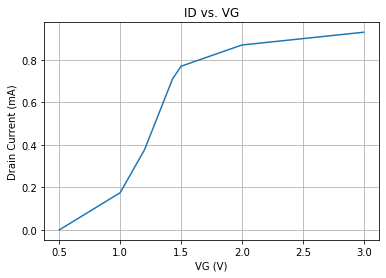

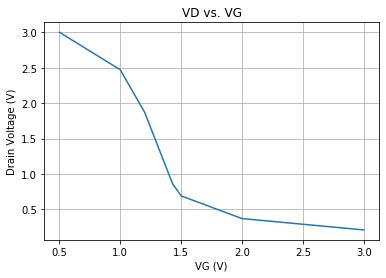

In [94]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
def plot_point ( t, data, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    ax.plot(t, data)
    ax.set(xlabel=xlabel, ylabel=ylabel,
           title=title)
    ax.grid()
    plt.show()

VGS = [0.5, 1, 1.2, 1.43, 1.5, 2, 3]
ID = [0,.175,.377,0.71,.77,.87,.93]
VD = [3,2.47,1.87,.86,.69,.37,.21]

# ID vs. VGS
plot_point(t=VGS, data=ID, xlabel = 'VG (V)', ylabel = 'Drain Current (mA)', title = 'ID vs. VG')
# VD vs. VGS
plot_point(t=VGS, data=VD, xlabel = 'VG (V)', ylabel = 'Drain Voltage (V)', title = 'VD vs. VG')